In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
files= [file for file in os.listdir(r"C:\Users\Dhruv\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data")]

In [3]:
alldata=pd.DataFrame()
for file in files:
    df= pd.read_csv(r"C:\Users\Dhruv\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data/"+file)
    alldata=pd.concat([alldata,df])
    
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
alldata.dropna(axis=0,inplace=True)
alldata.to_csv('alldata.csv',index=False)

## Reading new combined sheet

In [5]:
data=pd.read_csv('alldata.csv')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186305 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


## Augment Data with Additional Columns

### Adding a Month Column

In [7]:
data['Month']=data['Order Date'].str[0:2]
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


## Data Cleaning

In [8]:
data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

### Deleting Duplicate headers

In [9]:
temp_df=data[data['Month'].str[0:2]=='Or']
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
517,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1146,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1152,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2869,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2884,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
184624,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185009,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186019,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186088,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [10]:
data =data[data['Month'].str[0:2]!='Or']

In [11]:
data['Month']=data['Month'].astype('int32')
data

C:\Users\Dhruv\AppData\Local\Temp\ipykernel_8300\552911149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month']=data['Month'].astype('int32')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


### Adding a Sales Column

In [12]:
data['Price Each']=pd.to_numeric(data['Price Each'])


C:\Users\Dhruv\AppData\Local\Temp\ipykernel_8300\474294767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price Each']=pd.to_numeric(data['Price Each'])


In [13]:
data['Quantity Ordered']=pd.to_numeric(data['Quantity Ordered'])


C:\Users\Dhruv\AppData\Local\Temp\ipykernel_8300\889088493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quantity Ordered']=pd.to_numeric(data['Quantity Ordered'])


In [14]:
data['Sales']= data['Quantity Ordered']* data['Price Each']
data

C:\Users\Dhruv\AppData\Local\Temp\ipykernel_8300\2388468507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sales']= data['Quantity Ordered']* data['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186301,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186302,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


### Question 1: What is the best sales per month? How much was earned per month?

In [15]:
sales=data.groupby('Month')['Sales'].sum().round(0)
sales

Month
1     1822257.0
2     2202022.0
3     2807100.0
4     3390670.0
5     3152607.0
6     2577802.0
7     2647776.0
8     2244468.0
9     2097560.0
10    3736727.0
11    3199603.0
12    4613443.0
Name: Sales, dtype: float64

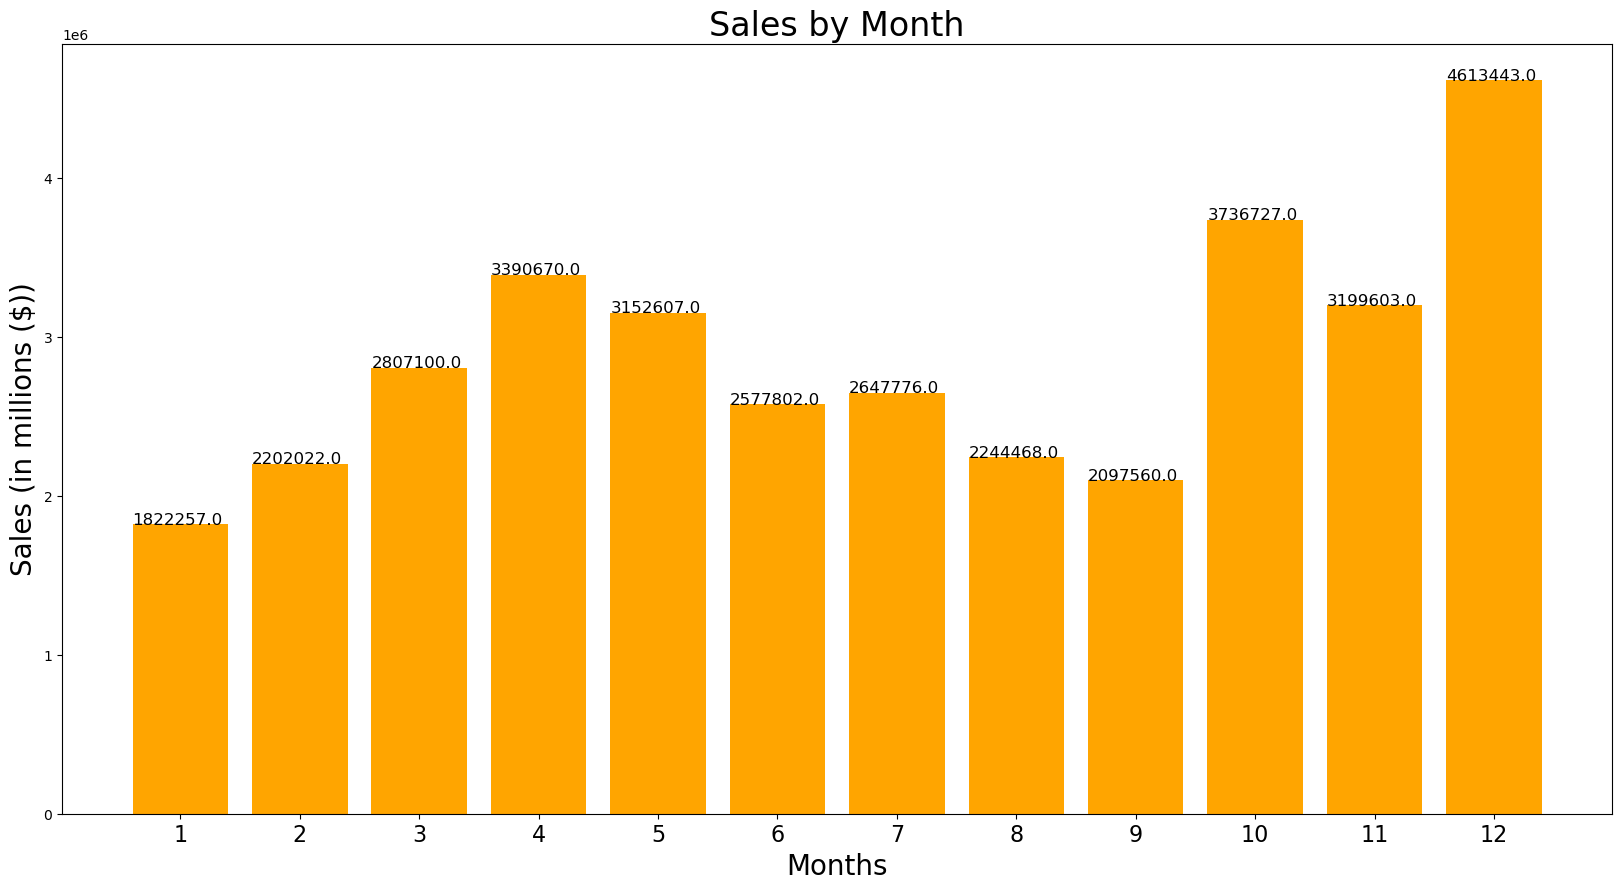

In [16]:
def addlabels(x,y):
    for i in x:
        plt.text(i-0.4,y[i],y[i],fontdict={'fontsize': 12})
months=range(1,13)
plt.figure(figsize=(20,10))
plt.bar(months,sales,color='Orange')
plt.xticks(months,size=16)
plt.title('Sales by Month',fontsize=24)
plt.xlabel('Months',fontsize=20)
plt.ylabel('Sales (in millions ($))',fontsize=20)
addlabels(months,sales)
plt.show()

### Question 2: What is the sales done throughout the year by city?

In [17]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Adding a City and State Column

In [18]:
data['City']=data['Purchase Address'].str.split(",").str[1]
data['State']=data['Purchase Address'].str.split(",").str[2].str[:3]
data['City']=data['City']+'('+data['State']+')'
data.head()

C:\Users\Dhruv\AppData\Local\Temp\ipykernel_8300\813660126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['City']=data['Purchase Address'].str.split(",").str[1]
C:\Users\Dhruv\AppData\Local\Temp\ipykernel_8300\813660126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['State']=data['Purchase Address'].str.split(",").str[2].str[:3]
C:\Users\Dhruv\AppData\Local\Temp\ipykernel_8300\813660126.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas( TX),TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston( MA),MA
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles( CA),CA
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles( CA),CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles( CA),CA


In [19]:
data= data.drop(columns='State',axis=1)
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas( TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston( MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles( CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles( CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles( CA)
...,...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles( CA)
186301,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco( CA)
186302,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco( CA)
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco( CA)


In [20]:
City_Sales=data.groupby('City')['Sales'].sum()
City_Sales=City_Sales.sort_values(ascending=False)

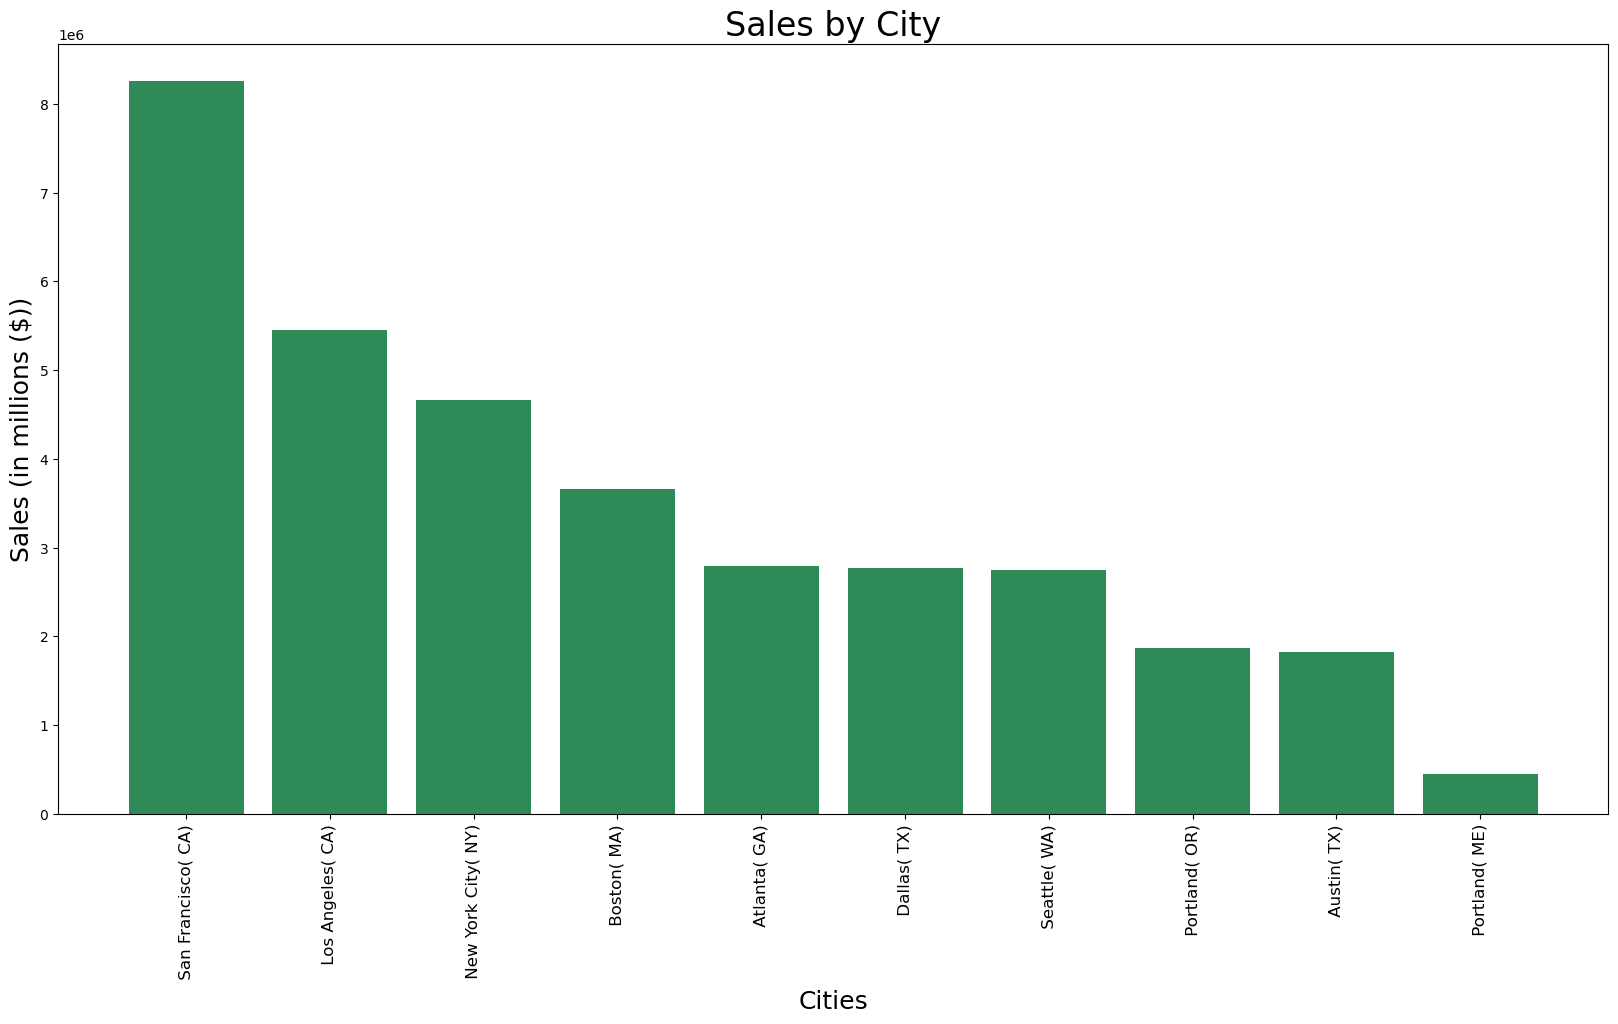

In [21]:
x=City_Sales.keys()
y=City_Sales.values
plt.figure(figsize=(20,10))
plt.bar(x,y,color='seagreen')
plt.xticks(x,rotation='vertical',size=12)
plt.title('Sales by City',fontsize=24)
plt.xlabel('Cities',fontsize=18)
plt.ylabel('Sales (in millions ($))',fontsize=18)
plt.show()

In [22]:

#second method to do the same
#temp_df= data

#temp_df.drop(columns='City',inplace=True)

#temp_df

#def getcity(address):
    #return address.split(',')[1]
#def getstate(address):
    #return address.split(',')[2].split(' ')[1]
#temp_df['city']=temp_df['Purchase Address'].apply(lambda x:f"{getcity(x)} ({getstate(x)})")

#temp_df

### Question 3: What time should we display advertisements to increase customer likelehood to buy the product?

In [23]:
data['Order Date']=pd.to_datetime(data['Order Date'])

In [24]:
data['Hours']=data['Order Date'].dt.hour

In [25]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas( TX),8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston( MA),22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles( CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles( CA),14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles( CA),9
...,...,...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles( CA),20
186301,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco( CA),16
186302,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco( CA),7
186303,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco( CA),17


In [26]:
df=data.groupby('Hours')['Sales'].count()
df.sort_values(ascending=False)

Hours
19    12905
12    12587
11    12411
18    12280
20    12228
13    12129
14    10984
10    10944
21    10921
17    10899
16    10384
15    10175
22     8822
9      8748
23     6275
8      6256
7      4011
0      3910
6      2482
1      2350
5      1321
2      1243
4       854
3       831
Name: Sales, dtype: int64

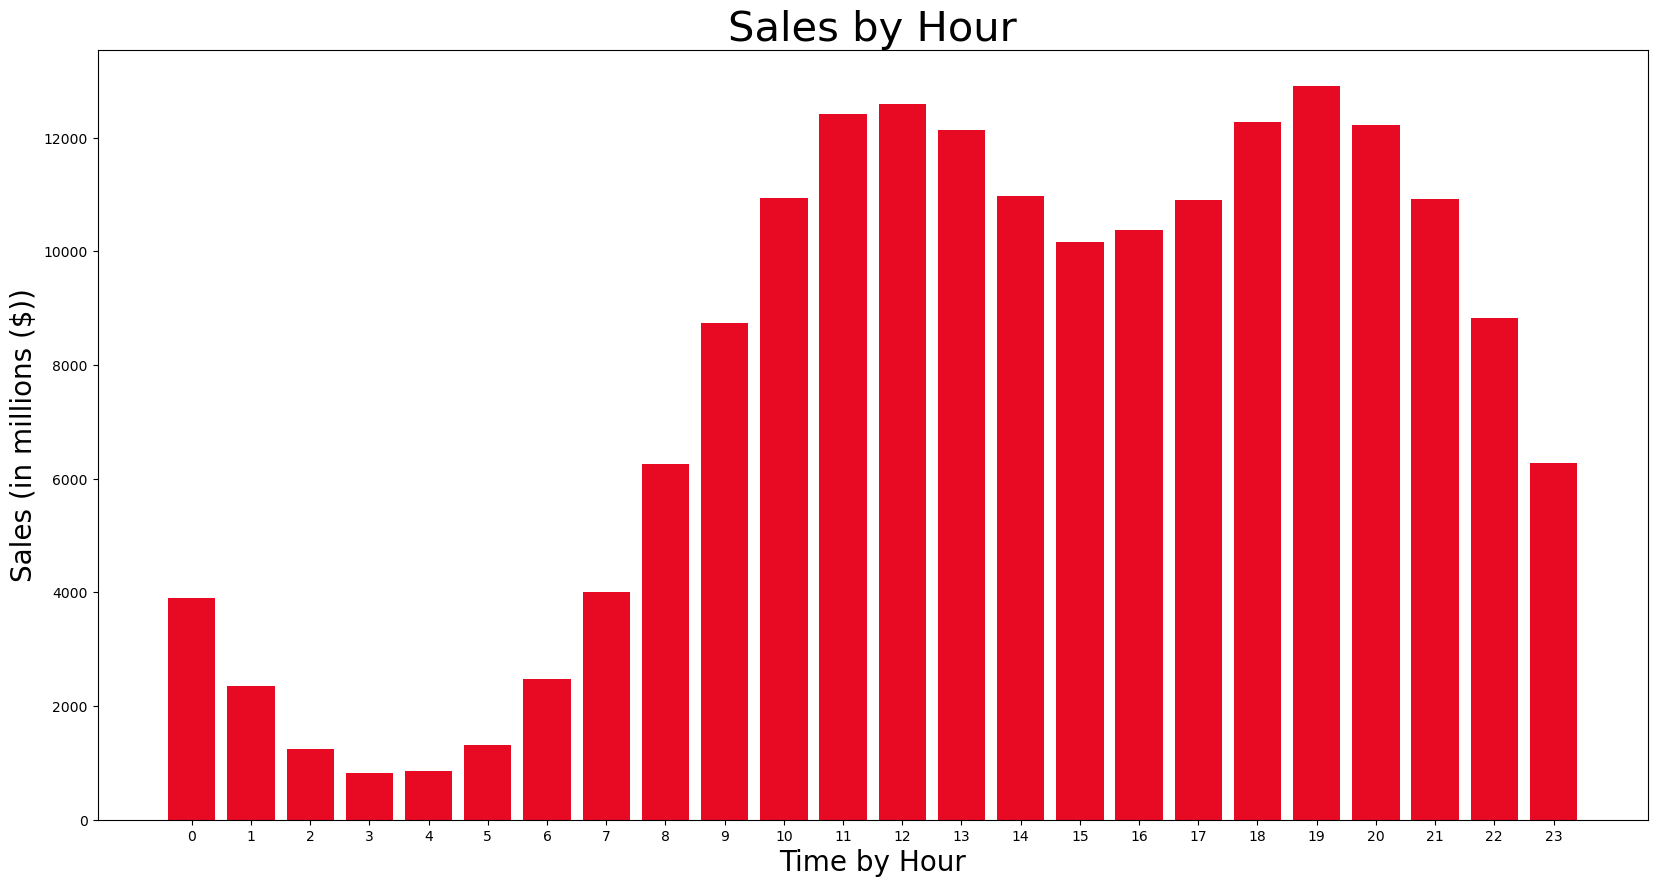

In [27]:
plt.figure(figsize=(20,10))
x=df.keys().astype('str')
y=df.values
plt.bar(x,y,color='#E80A22')
plt.title('Sales by Hour', fontsize=30)
plt.xlabel('Time by Hour',fontsize=20)
plt.ylabel('Sales (in millions ($))',fontsize=20)
plt.show()

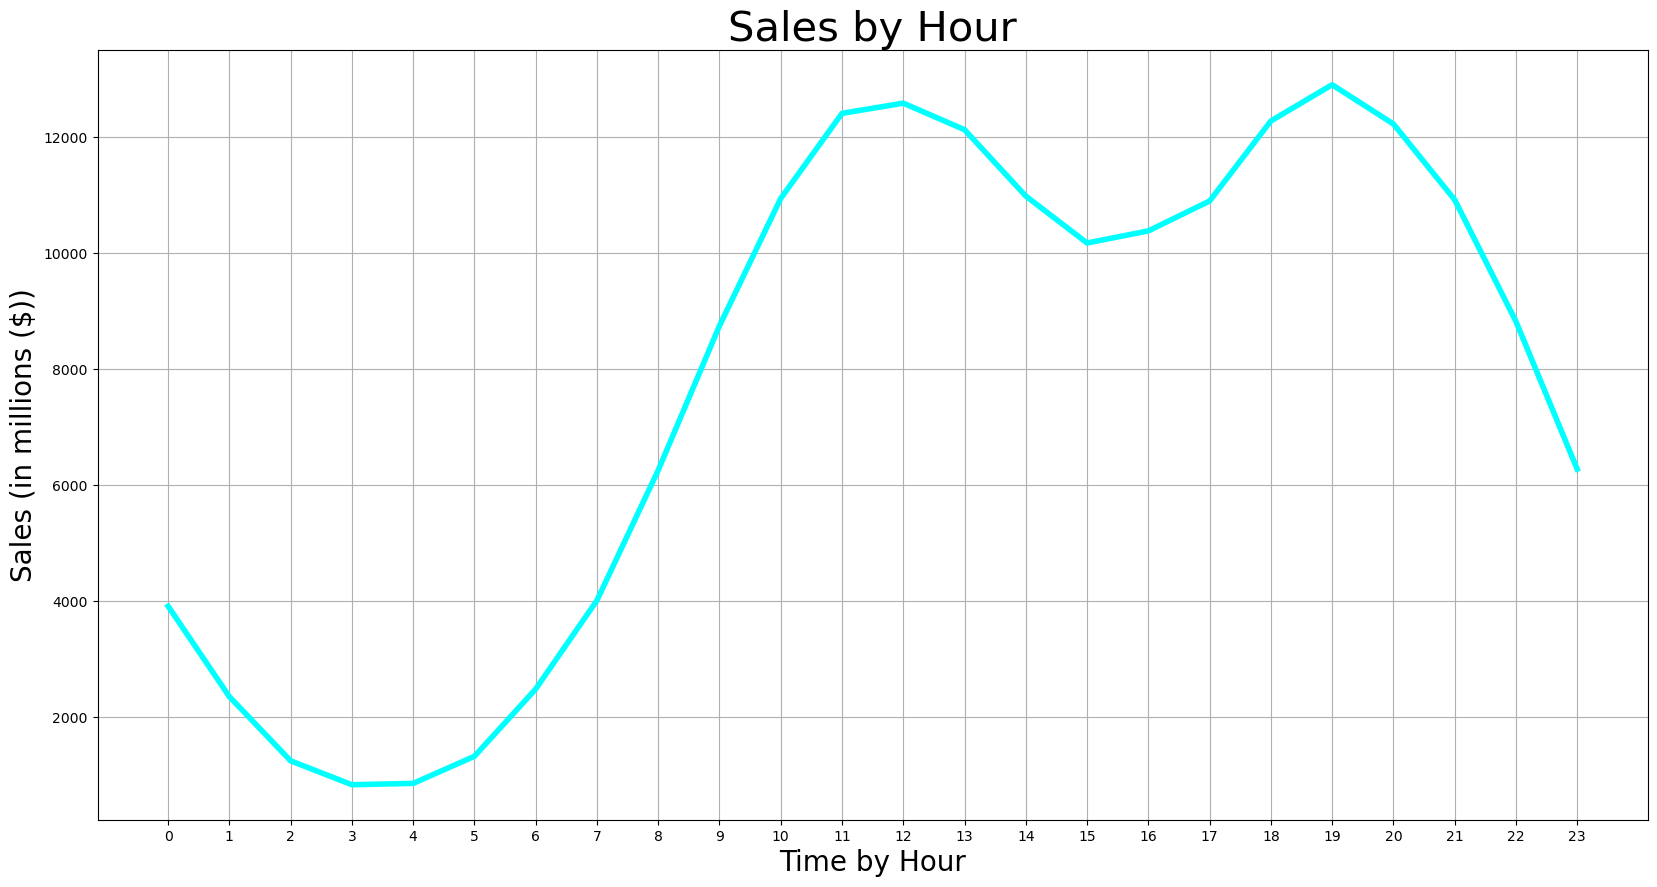

In [28]:
plt.figure(figsize=(20,10))
plt.plot(x,y,lw=4,color='Cyan')
plt.title('Sales by Hour', fontsize=30)
plt.xlabel('Time by Hour',fontsize=20)
plt.ylabel('Sales (in millions ($))',fontsize=20)
plt.grid()
plt.show()


### My Recommendation for the ad campaign is between 11am to 1pm or 6-8pm.

### Question 4: What is the most sold product and Why?

In [29]:
most_sold=data.groupby('Product')['Quantity Ordered'].sum()
most_sold.sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

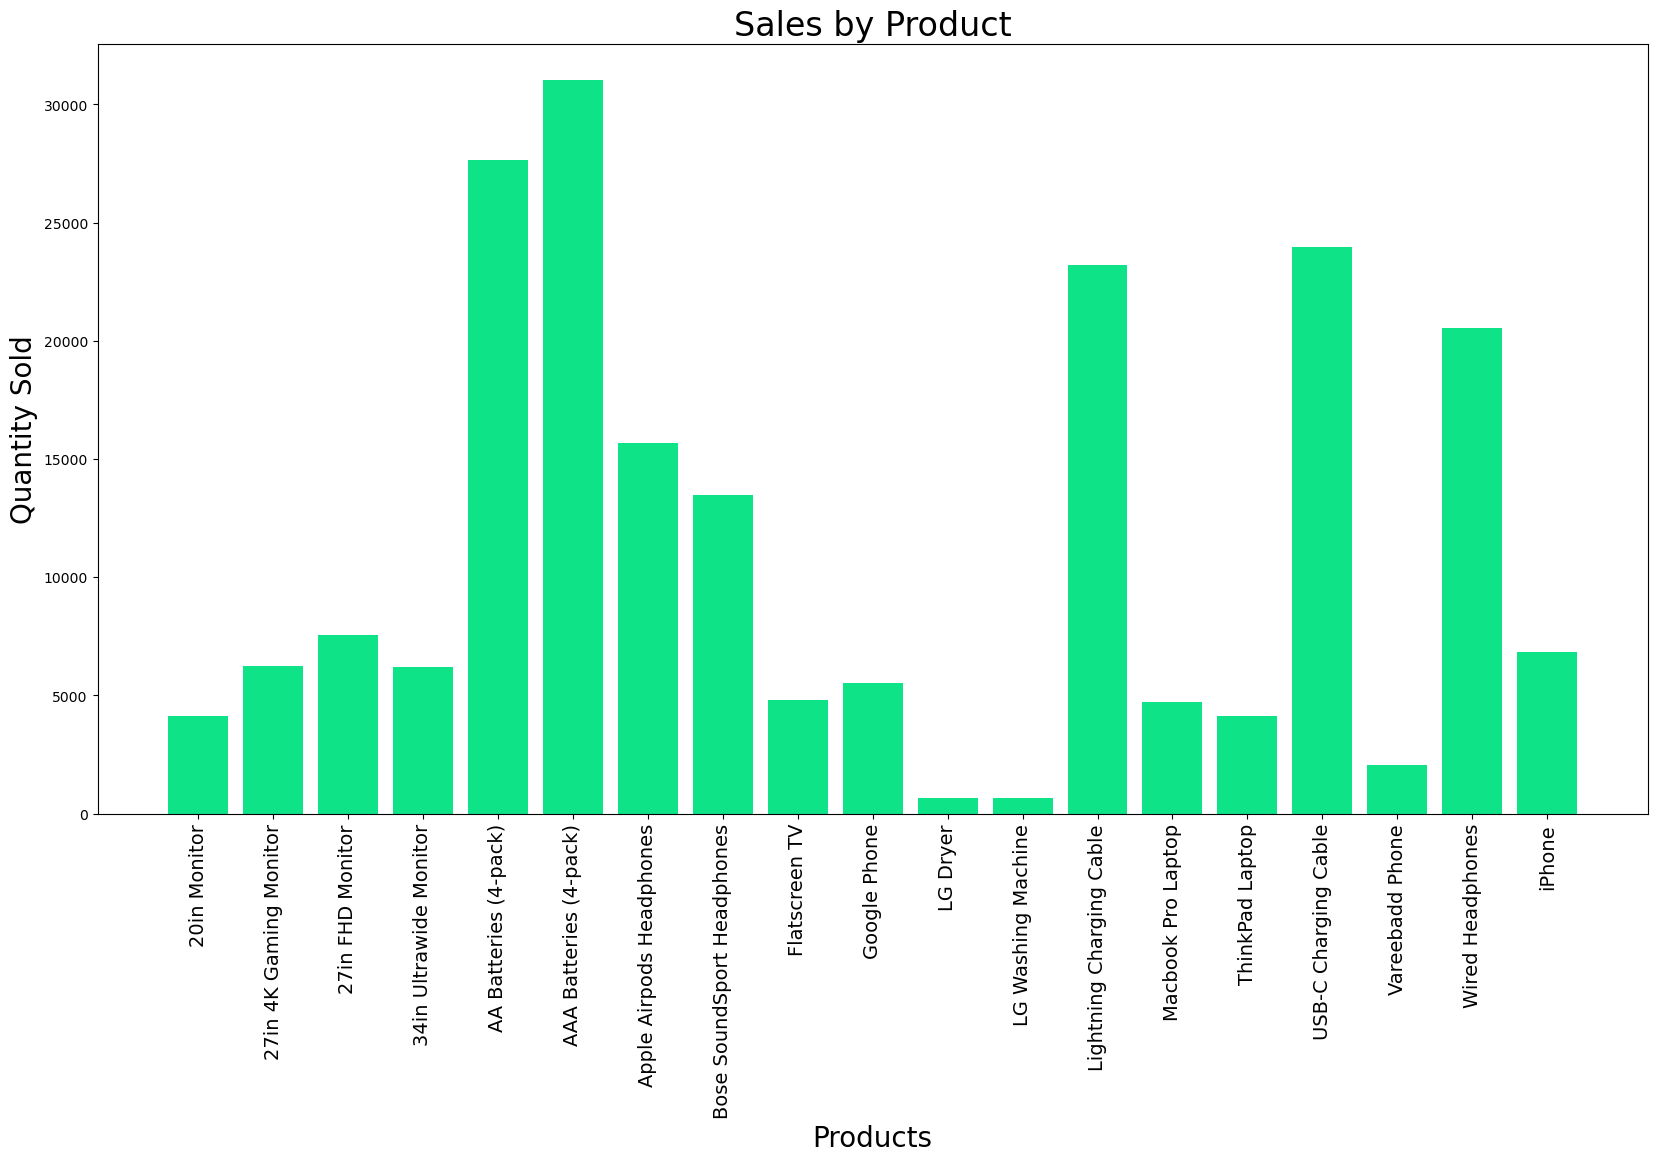

In [30]:
plt.figure(figsize=(20,10))
x=most_sold.keys()
y=most_sold.values
plt.bar(x,y,color='#0FE388')
plt.xticks(x,rotation='vertical',size=14)
plt.title('Sales by Product', fontsize=24)
plt.xlabel('Products',fontsize=20)
plt.ylabel('Quantity Sold',fontsize=20)
plt.show()

#### The Major reason for the most sold ,i.e., 
#### AAA Batteries (4-pack) -------->  31017
#### AA Batteries (4-pack)    -------->  27635
#### USB-C Charging Cable  --------> 23975
#### Lightning Charging Cable  --------> 23217
#### Wired Headphones    --------> 20557
#### is because of the price of all these items is very less compared to other items''')

In [31]:
prices=data.groupby('Product')['Price Each'].mean()

C:\Users\Dhruv\AppData\Local\Temp\ipykernel_8300\1333084135.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x,rotation='vertical',size=14)
C:\Users\Dhruv\AppData\Local\Temp\ipykernel_8300\1333084135.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(y,size=14)
C:\Users\Dhruv\AppData\Local\Temp\ipykernel_8300\1333084135.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(prices,size=14)
C:\Users\Dhruv\AppData\Local\Temp\ipykernel_8300\1333084135.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


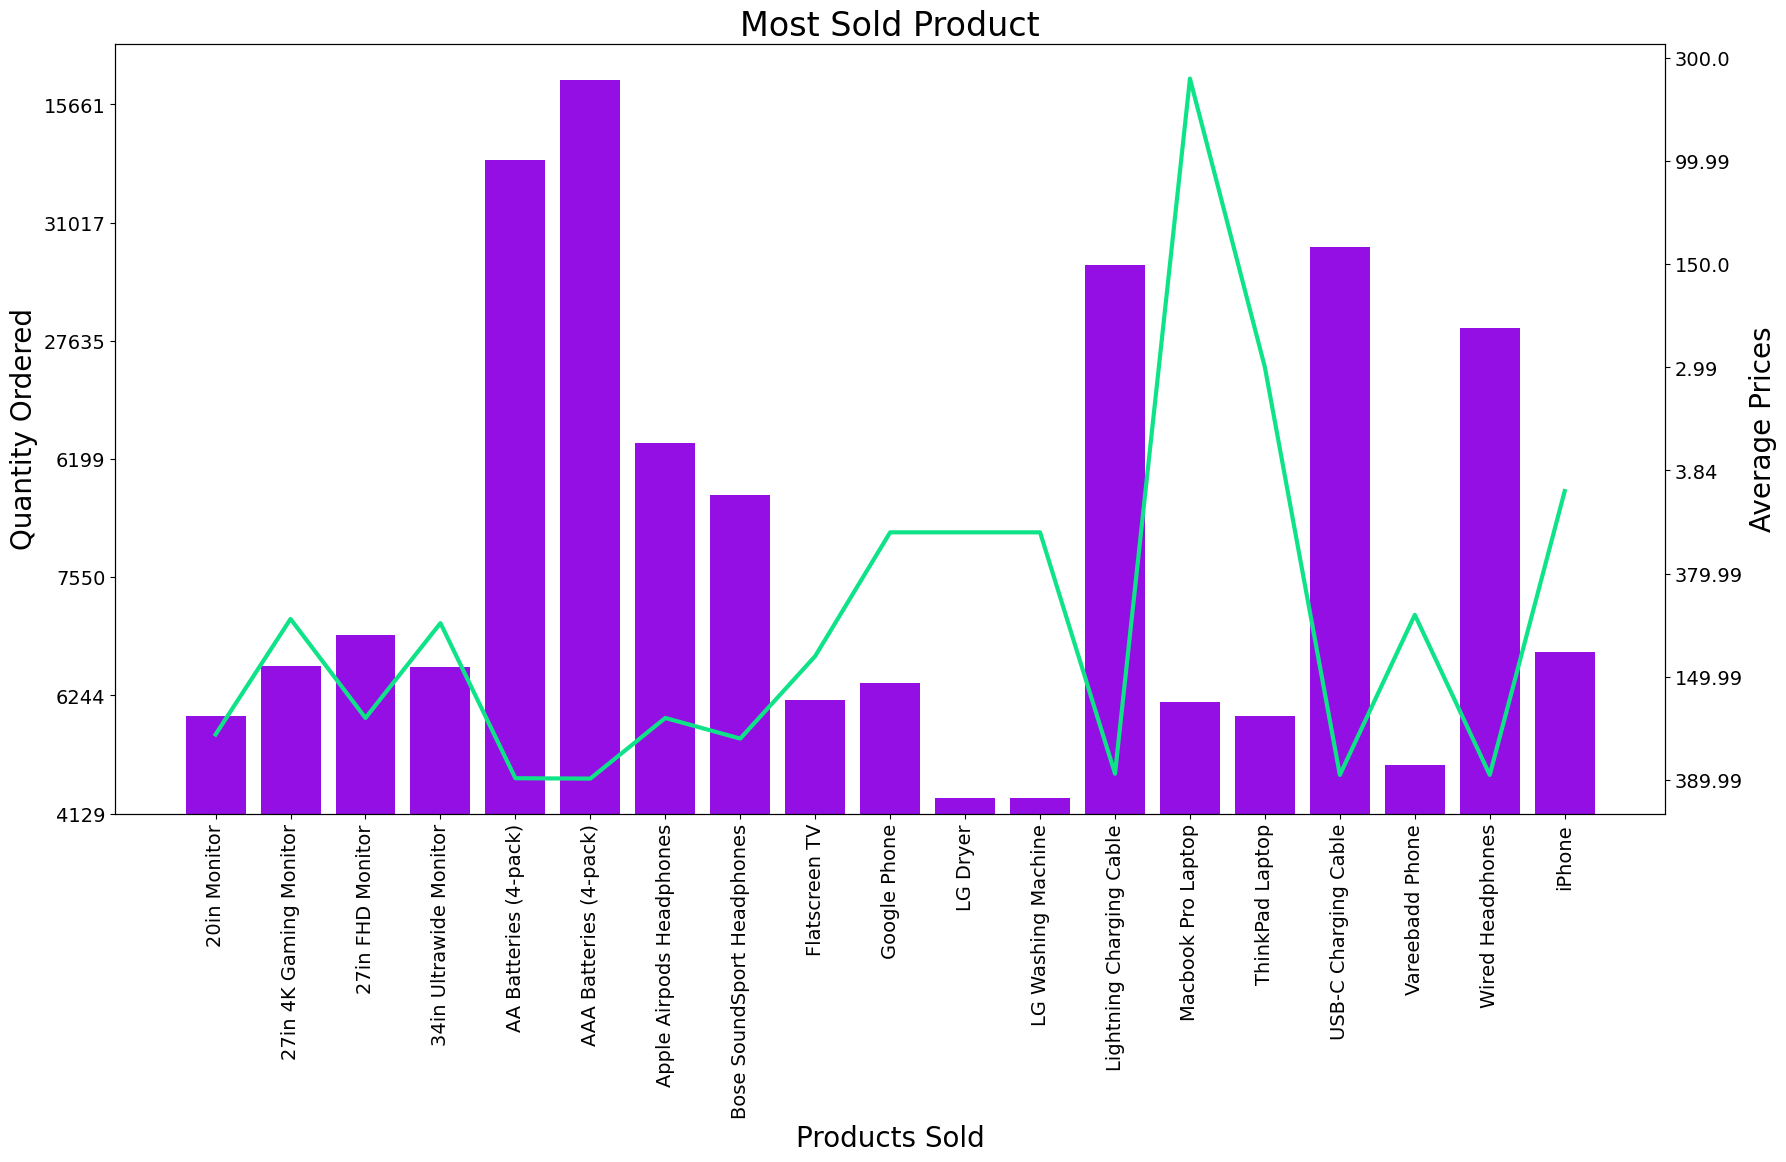

In [32]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.bar(x,y,color='#940FE3')

ax2 = ax1.twinx()
ax2.plot(x,prices,lw=3,color='#0FE388')
ax1.set_xticklabels(x,rotation='vertical',size=14)
ax1.set_yticklabels(y,size=14)
ax2.set_yticklabels(prices,size=14)
ax1.set_title('Most Sold Product', fontsize=24)
ax1.set_xlabel('Products Sold',fontsize=20)
ax1.set_ylabel('Quantity Ordered',fontsize=20)
ax2.set_ylabel('Average Prices',fontsize=20)
fig.show()

### Question 5: What Products are mostly sold together?

In [33]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas( TX),8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston( MA),22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles( CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles( CA),14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles( CA),9
...,...,...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles( CA),20
186301,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco( CA),16
186302,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco( CA),7
186303,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco( CA),17


In [34]:
df=data[data['Order ID'].duplicated(keep=False)]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles( CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles( CA),14
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles( CA),19
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles( CA),19
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston( MA),11
...,...,...,...,...,...,...,...,...,...,...
186248,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta( GA),20
186259,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta( GA),0
186260,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta( GA),0
186296,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco( CA),13


In [35]:
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
df=df[['Order ID','Grouped']].drop_duplicates()
df

C:\Users\Dhruv\AppData\Local\Temp\ipykernel_8300\3329295510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186237,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186239,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186247,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186259,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [36]:
from itertools import combinations
from collections import Counter

In [40]:
count = Counter()

for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [54]:
pair_sold=pd.DataFrame(count.most_common(10),columns=['Product pair','Quantity'])

In [55]:
pair_sold.set_index('Product pair')

,Quantity
Product pair,
"(iPhone, Lightning Charging Cable)",1005
"(Google Phone, USB-C Charging Cable)",987
"(iPhone, Wired Headphones)",447
"(Google Phone, Wired Headphones)",414
"(Vareebadd Phone, USB-C Charging Cable)",361
"(iPhone, Apple Airpods Headphones)",360
"(Google Phone, Bose SoundSport Headphones)",220
"(USB-C Charging Cable, Wired Headphones)",160
"(Vareebadd Phone, Wired Headphones)",143


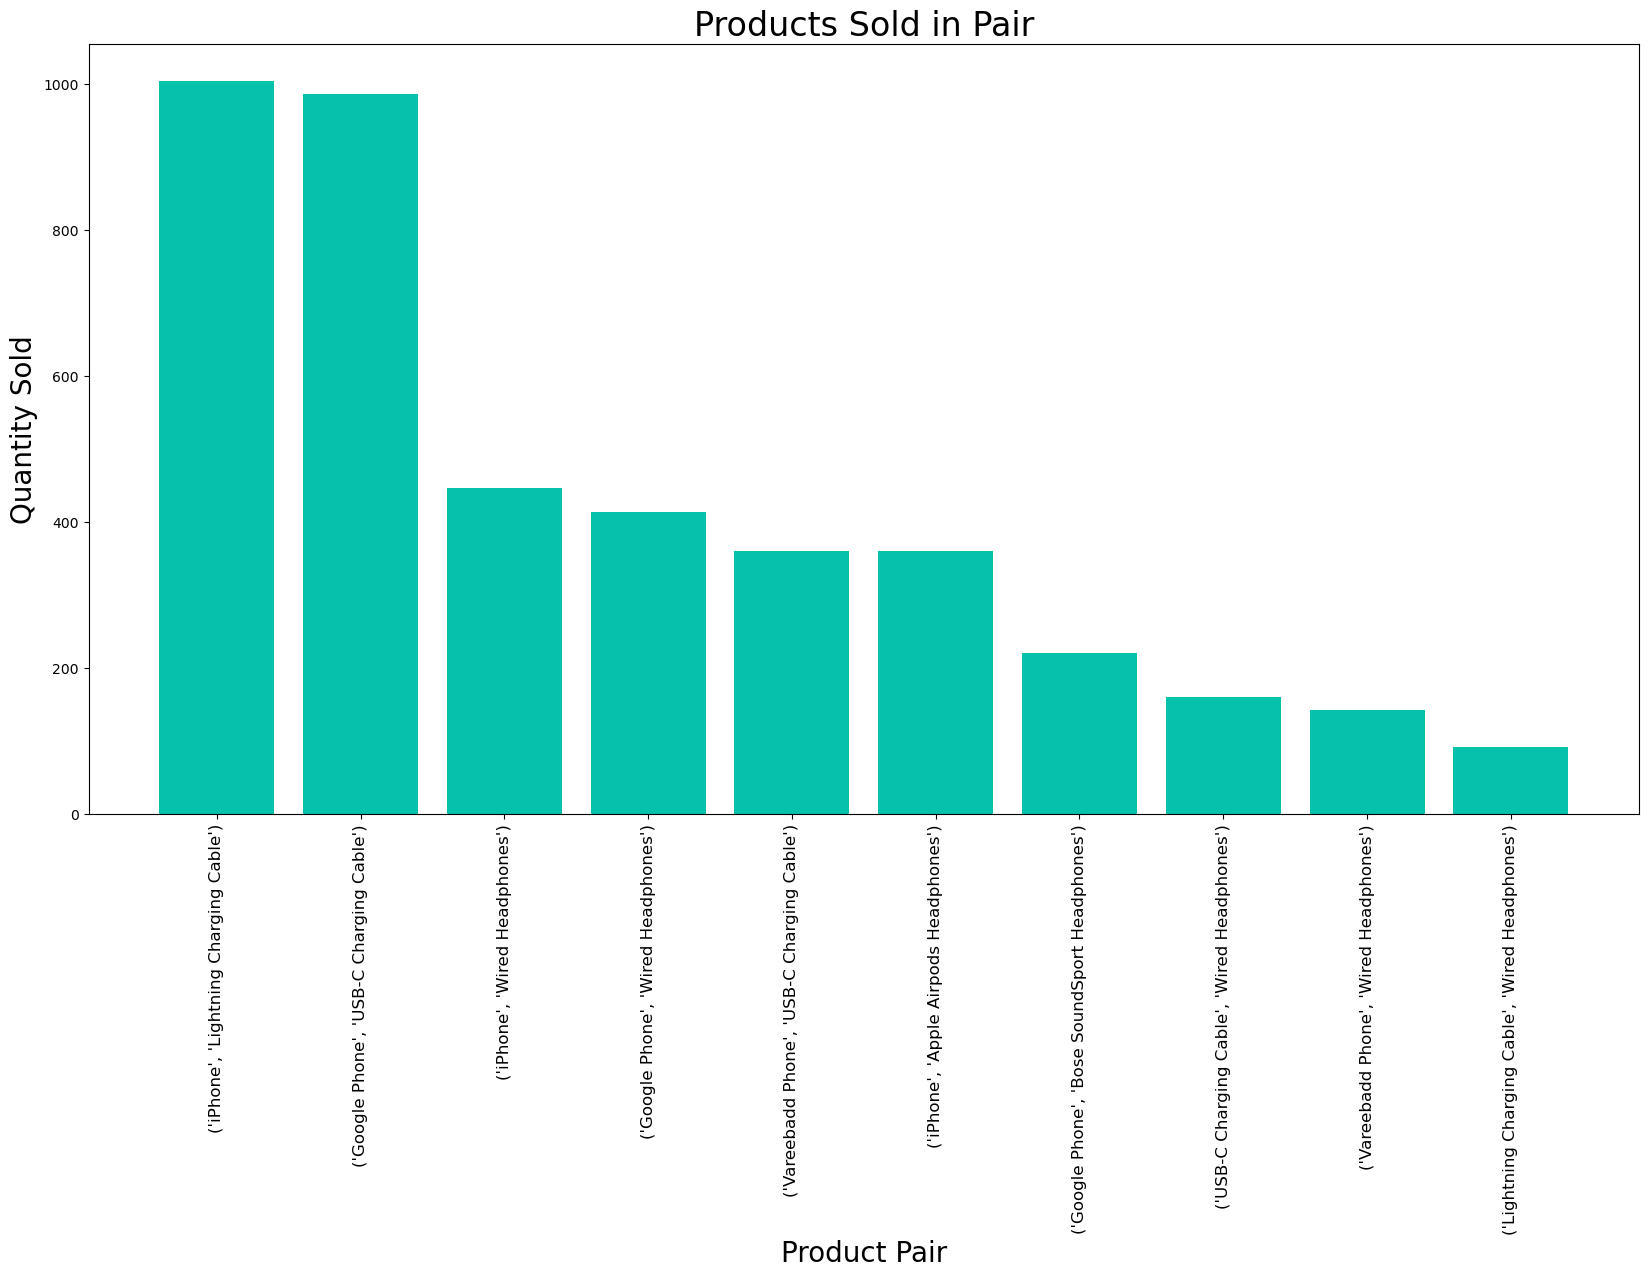

In [79]:
plt.figure(figsize=(20,10))
x=pair_sold['Product pair'].astype('str')
y=pair_sold['Quantity']
plt.bar(x,height=y,color='#06C2AC')
plt.xticks(x,rotation='vertical',size=12)
plt.title('Products Sold in Pair', fontsize=24)
plt.xlabel('Product Pair',fontsize=20)
plt.ylabel('Quantity Sold',fontsize=20)
plt.show()

### Complementary Products are sold together more.